<h1><p style="text-align: center;">Python ile Veri Analizi <br>Proje No:  1</p><h1> - Trafik Polisi Kontrol Noktaları <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Analizinize başlamadan önce, onunla çalışmayı daha verimli bir süreç haline getirmek için önce veri setini incelemeniz ve temizlemeniz çok önemlidir. Stanford Open Policing Project veri kümesini öğrenirken veri türlerini düzeltme, eksik değerleri ele alma, sütunları ve satırları çıkartma alıştırması yapacaksınız.

***

## Veri setinin incelenmesi

Veri setinin incelenmesi
Stanford Açık Polis Projesi tarafından toplanan Rhode Island'daki trafik duraklarına ilişkin bir veri kümesini analiz edeceksiniz.

Analizinize başlamadan önce, veri kümesine aşina olmanız önemlidir. Veri kümesini panda ile okuyacak, ilk birkaç satırı inceleyecek ve ardından eksik değerlerini sayacaksınız.

**TALİMATLAR**
* ``pd``. takma adını kullanarak pandaları içe aktarın.
* Police.csv dosyasını``ri``adlı bir ``DataFrame``'e okuyun
* DataFrame'in ilk 5 satırını inceleyin (``"head"`` olarak bilinir).
* Her sütundaki eksik değerlerin sayısını sayın: Hangi DataFrame öğelerinin eksik olduğunu kontrol etmek için ``.isnull()'``u kullanın ve ardından her sütundaki ``True`` değerlerinin sayısını saymak için .sum()'u alın.


In [1]:
import pandas as pd

In [2]:
ri=pd.read_csv("police.csv")

C:\Users\C\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [4]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

***

## Sütunları çıkartma işlemi

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the ``DataFrame``, to make it easier for you to focus on the remaining columns.

You'll drop the ``county_name`` column because it only contains missing values, and you'll drop the ``state`` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

Sütunları çıkartmak
Çoğu zaman, bir DataFrame, analiziniz için yararlı olmayan sütunlar içerir. Kalan sütunlara odaklanmanızı kolaylaştırmak için bu tür sütunlar DataFrame'den çıkarılmalıdır.
Yalnızca eksik değerler içerdiğinden ilçe_adı (county_name) sütununu çıkaracaksınız ve tüm trafik durakları tek bir eyalette (Rhode Island) gerçekleştiği için eyalet sütununu çıkaracaksınız. Bu nedenle, bu sütunlar hiçbir yararlı bilgi içermediklerinden atlanabilir.


**INSTRUCTIONS**

*   Examine the ``DataFrame``'s shape to find out the number of rows and columns.

*   Drop the columns that almost consist of missing values. 

*   Examine the ``.shape`` again to verify that there are now two fewer columns.

TALİMATLAR
• Satır ve sütun sayısını bulmak için DataFrame'in şeklini inceleyin.
• Hemen hemen tüm değerleri eksik olan sütunları çıkarın
• Çıkarma işleminin yapıldığını denetlemek ve sütün sayısının 2 azaldığnı doğrulamak için .shape'i  komutuyla kontrol edin


In [5]:
ri.shape

(509681, 26)

In [6]:
ri.drop(["county_name","state" ], axis=1, inplace=True)

In [7]:
ri.shape

(509681, 24)

In [8]:
ri.dropna(how='all', axis=1, inplace=True)

In [9]:
ri.shape

(509681, 22)

***

## Satırları çıkartma

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the ``driver_gender`` column will be critical to many of your analyses. Because only a small fraction of rows are missing ``driver_gender``, we'll drop those rows from the dataset.

Belirli bir sütunun analiziniz için kritik olacağını bildiğinizde ve satırların yalnızca küçük bir bölümünde bu sütunda bir değer eksik olduğunda, bu satırları veri kümesinden çıkarmak genellikle mantıklıdır.
Bu kurs sırasında, driver_gender sütunu, analizlerinizin çoğu için kritik olacaktır. Satırların yalnızca küçük bir bölümünde driver_gender eksik olduğundan, bu satırları veri kümesinden çıkaracağız.


**INSTRUCTIONS**

*   Count the number of missing values in each column.

*   Drop all rows that are missing ``driver_gender`` by passing the column name to the subset parameter of ``.dropna()``.
*   Count the number of missing values in each column again, to verify that none of the remaining rows are missing ``driver_gender``.
*   Examine the ``DataFrame``'s ``.shape`` to see how many rows and columns remain.

**TALİMATLAR**
* Her sütundaki eksik değerlerin sayısını sayın.
* Sütun adını `.dropna()`'nın alt küme parametresine ileterek, `driver_gender` eksik olan tüm satırları çıkarın.
* Kalan satırlardan hiçbirinin eksik ``driver_gender`` olmadığını doğrulamak için her sütundaki eksik değerlerin sayısını tekrar sayın.
* Kaç satır ve sütun kaldığını görmek için ``DataFrame`` 'in ``.shape``'ini inceleyin.


In [10]:
ri.isna().sum()

id                         0
stop_date                 10
stop_time                 10
location_raw               0
police_department         10
driver_gender          29097
driver_age_raw         29049
driver_age             30695
driver_race_raw        29073
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type_raw       491919
search_type           491919
contraband_found           0
stop_outcome           29073
is_arrested            29073
stop_duration          29073
out_of_state           29881
drugs_related_stop         0
district                   0
dtype: int64

In [11]:
ri.dropna(subset=['driver_gender'],inplace=True)

In [12]:
ri.isnull().sum()

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

In [13]:
ri.shape

(480584, 22)

***

## Bir data tipini düzeltme

We know that the ``is_arrested`` column currently has the ``object`` data type. In this exercise, we'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

Bir veri türünü düzeltme
is_arrested sütununun şu anda nesne veri türüne sahip olduğunu biliyoruz. Bu alıştırmada, True ve False değerlerini içeren bir sütun için en uygun tür olan veri türünü bool olarak değiştireceğiz.

Veri türünü düzeltmek, is_arrested sütununda başka türlü mümkün olmayan matematiksel işlemleri kullanmamızı sağlayacaktır.


**INSTRUCTIONS**

*   Examine the head of the ``is_arrested`` column to verify that it contains ``True`` and ``False`` values.
*   Check the current data type of ``is_arrested``.
*   Use the ``.astype()`` method to convert ``is_arrested`` to a ``bool`` column.
*   Check the new data type of ``is_arrested``, to confirm that it is now a ``bool`` column.

TALİMATLAR
• Doğru ve Yanlış değerleri içerdiğini doğrulamak için is_arrested sütununun başlığını inceleyin.
• is_arrested'ın mevcut veri tipini kontrol edin.
• is_arrested'ı bir bool sütununa dönüştürmek için .astype() yöntemini kullanın.
• Artık bir bool sütunu olduğunu doğrulamak için is_arrested yeni veri türünü kontrol edin.


In [14]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [15]:
ri.dtypes 

id                     object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted       object
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested            object
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object

#verileri True,False şeklinde kayıtlı  5 sütunun yalnız 2 sinin veri tipleri  bool

In [16]:
ri.search_conducted=ri.search_conducted.astype("bool")
ri.is_arrested=ri.is_arrested.astype("bool")
ri.out_of_state=ri.out_of_state.astype("bool")

In [17]:
ri.dtypes

id                     object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested              bool
stop_duration          object
out_of_state             bool
drugs_related_stop       bool
district               object
dtype: object

***

## nesne  ( object) olan  sütunları bir araya getirme 

Currently, the date and time of each traffic stop are stored in separate object columns: ``stop_date`` and ``stop_time``.

You'll combine these two columns into a single column, and then convert it to ``datetime`` format. This will enable convenient date-based attributes that we'll use later in the course.

Nesne sütunlarını birleştirme
Şu anda, her trafik durağının tarihi ve saati ayrı nesne sütunlarında depolanır: stop_date ve stop_time.
Bu iki sütunu tek bir sütunda birleştirecek ve ardından onu tarih saat biçimine dönüştüreceksiniz. Bu, kursun ilerleyen bölümlerinde kullanacağımız uygun tarih tabanlı özellikleri etkinleştirecektir.


**INSTRUCTIONS**

*    Use a string method to concatenate ``stop_date`` and ``stop_time`` (separated by a space), and store the result in ``combined``.
*    Convert ``combined`` to ``datetime`` format, and store the result in a new column named ``stop_datetime``.
*    Examine the ``DataFrame`` ``.dtypes`` to confirm that ``stop_datetime`` is a datetime column.

TALİMATLAR
• stop_date ve stop_time'ı (bir boşlukla ayrılmış) birleştirmek için bir dize yöntemi kullanın ve sonucu birleşik olarak saklayın.
• Birleşik tarih saat biçimine dönüştürün ve sonucu stop_datetime adlı yeni bir sütunda saklayın.
• stop_datetime öğesinin bir tarih saat sütunu olduğunu doğrulamak için DataFrame .dtypes'i inceleyin.

In [18]:
combined=ri.stop_date+" "+ri.stop_time

In [19]:
ri["stop_datetime"]=combined.astype("datetime64")

In [20]:
ri.dtypes

id                            object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                    bool
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [21]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


The last step that you'll take in this chapter is to set the ``stop_datetime`` column as the ``DataFrame``'s index. By replacing the default index with a ``DatetimeIndex``, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course.

Bu bölümde atacağınız son adım, stop_datetime sütununu DataFrame'in dizini olarak ayarlamaktır. Varsayılan dizini bir DatetimeIndex ile değiştirerek, veri kümesini tarih ve saate göre analiz etmeyi kolaylaştıracaksınız, bu da kursun ilerleyen bölümlerinde kullanışlı olacaktır.

**INSTRUCTIONS**

*   Set ``stop_datetime`` as the ``DataFrame`` index.
*   Examine the index to verify that it is a ``DatetimeIndex``.
*   Examine the ``DataFrame`` columns to confirm that ``stop_datetime`` is no longer one of the columns.

TALİMATLAR
• stop_datetime'ı DataFrame in index i olarak ayarlayın.
• Dizini bir DatetimeIndex olduğunu doğrulamak için inceleyin.
• stop_datetime öğesinin artık sütunlardan biri olmadığını doğrulamak için DataFrame sütunlarını inceleyin.


In [22]:
ri=ri.set_index("stop_datetime")

In [23]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [24]:
ri.to_csv("police_1.csv")

In [25]:
ri.shape

(480584, 22)

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Does the ``gender`` of a driver have an impact on police behavior during a traffic stop? **In this chapter**, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

***

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the ``violations`` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the ``violation`` column, and then separately express those counts as proportions.

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data.** Continue to this chapter based on where you were in the end of the previous chapter.

In [1]:
import numpy as np
import pandas as pd
def prc(x): return round(x*100,1)
    
df=pd.read_csv("police_1.csv", index_col=["stop_datetime"])

df.head()

C:\Users\C\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [2]:
df.shape

(480584, 22)

**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [3]:
pd.DataFrame(df.violation.value_counts()/1000)


,violation
Speeding,268.736
Moving violation,90.228
Equipment,61.250
Other,24.216
Registration/plates,19.830
Seat belt,16.324


In [4]:
pd.DataFrame(prc(df.violation.value_counts(normalize=True)))


,violation
Speeding,55.9
Moving violation,18.8
Equipment,12.7
Other,5.0
Registration/plates,4.1
Seat belt,3.4


## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [5]:
dF=df[df.driver_gender=="F"]
dM=df[df.driver_gender=="M"]

In [6]:
dF.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,2005-02-24,01:20,Zone X3,200,F,1983.0,22.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,2005-03-14,10:00,Zone K3,300,F,1984.0,21.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,2005-03-29,23:20,Zone K3,300,F,1971.0,34.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,2005-06-06,13:20,Zone X4,500,F,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-06-18 16:30:00,RI-2005-00037,2005-06-18,16:30,Zone X4,500,F,1964.0,41.0,W,White,...,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4


In [7]:
prc(dF.violation.value_counts(normalize=True))

Speeding               65.7
Moving violation       13.7
Equipment              10.7
Registration/plates     4.3
Other                   2.9
Seat belt               2.7
Name: violation, dtype: float64

In [8]:
prc(dM.violation.value_counts(normalize=True))

Speeding               52.2
Moving violation       20.7
Equipment              13.5
Other                   5.8
Registration/plates     4.1
Seat belt               3.7
Name: violation, dtype: float64

***

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [9]:
#female_and_speeding
dFspeed=dF[dF.violation=="Speeding"]

In [10]:
#male_and_speeding
dMspeed=dM[dM.violation=="Speeding"]

In [11]:
prc(dFspeed.stop_outcome.value_counts(normalize=True))

Citation            95.3
Warning              3.9
Arrest Driver        0.5
Arrest Passenger     0.1
N/D                  0.1
No Action            0.1
Name: stop_outcome, dtype: float64

In [12]:
prc(dMspeed.stop_outcome.value_counts(normalize=True))

Citation            94.5
Warning              3.6
Arrest Driver        1.6
Arrest Passenger     0.1
N/D                  0.1
No Action            0.1
Name: stop_outcome, dtype: float64

In [13]:
# Erkekler ve bayanların trafik ihlali yapmaları durumunda aldıkları ceza oranları yaklaşık aynı 

In [14]:
dMspeed.violation.value_counts()

Speeding    182538
Name: violation, dtype: int64

In [15]:
dFspeed.violation.value_counts()

Speeding    86198
Name: violation, dtype: int64

In [16]:
# Erkekler bayanlardan daha çok daha  fazla sayıda  hız ihlali yapmış

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [17]:
df.search_conducted.dtype

dtype('bool')

In [18]:
prc(df.search_conducted.value_counts(normalize=True))

False    96.3
True      3.7
Name: search_conducted, dtype: float64

In [19]:
prc(df.search_conducted.mean())

3.7

***

## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [36]:
prc(df[df.driver_gender=="F"].search_conducted.mean())

1.9

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [35]:
prc(df[df.driver_gender=="M"].search_conducted.mean())

4.4

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [34]:
prc(df.groupby("driver_gender").search_conducted.mean())

driver_gender
F    1.9
M    4.4
Name: search_conducted, dtype: float64

***

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [33]:
prc(df.groupby(["driver_gender","violation"]).search_conducted.mean())

driver_gender  violation          
F              Equipment               4.0
               Moving violation        3.8
               Other                   4.6
               Registration/plates     5.5
               Seat belt               1.8
               Speeding                0.8
M              Equipment               7.1
               Moving violation        5.9
               Other                   4.6
               Registration/plates    10.4
               Seat belt               3.2
               Speeding                2.7
Name: search_conducted, dtype: float64

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [24]:
prc(df.groupby(["violation","driver_gender"]).search_conducted.mean())

violation            driver_gender
Equipment            F                 4.0
                     M                 7.1
Moving violation     F                 3.8
                     M                 5.9
Other                F                 4.6
                     M                 4.6
Registration/plates  F                 5.5
                     M                10.4
Seat belt            F                 1.8
                     M                 3.2
Speeding             F                 0.8
                     M                 2.7
Name: search_conducted, dtype: float64

***

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [25]:
df.search_type.value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [26]:
df["frisk"]=df.search_type=="Protective Frisk" 
df.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [27]:
(df.frisk==True).sum()

879

***

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [28]:
dfsc=df[df.search_conducted==True]

In [29]:
prc(dfsc.frisk.mean())

4.9

In [30]:
prc(dfsc.groupby("driver_gender").frisk.mean())

driver_gender
F    4.2
M    5.1
Name: frisk, dtype: float64

In [31]:
# Araba kontrolü esnasındaki Bayan ve erkek üst arama oranları yaklaşık aynı  %4,2 F -%5 M

In [32]:
df.to_csv("police_2.csv")

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [1]:
import numpy as np
import pandas as pd
def prc(x):return round(x*100,1)

df=pd.read_csv("police_2.csv",parse_dates=True, index_col=["stop_datetime"])
df.head()

C:\Users\C\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [2]:
df.is_arrested.value_counts()

False    463981
True      16603
Name: is_arrested, dtype: int64

In [3]:
prc(df.is_arrested.mean())

3.5

In [4]:
prc(df.groupby(df.index.hour).is_arrested.mean())


stop_datetime
0     5.2
1     6.7
2     6.1
3     5.3
4     5.4
5     3.3
6     1.3
7     1.4
8     2.0
9     2.5
10    2.6
11    2.7
12    3.1
13    3.0
14    3.2
15    3.2
16    3.4
17    3.9
18    4.0
19    3.1
20    3.9
21    6.0
22    4.4
23    4.5
Name: is_arrested, dtype: float64

In [5]:
hourly_arrest_rate=df.groupby(df.index.hour).is_arrested.mean()


***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [6]:
import matplotlib.pyplot as plt

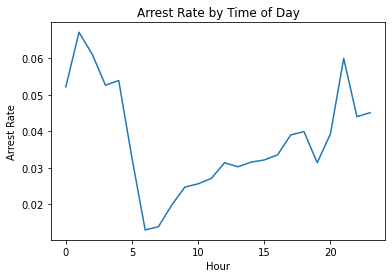

In [7]:
plt.plot(hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [8]:
prc(df.drugs_related_stop.resample("A").mean())

stop_datetime
2005-12-31    0.8
2006-12-31    0.7
2007-12-31    0.8
2008-12-31    0.8
2009-12-31    1.0
2010-12-31    1.0
2011-12-31    1.1
2012-12-31    1.0
2013-12-31    1.2
2014-12-31    1.3
2015-12-31    1.1
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [9]:
# Resample("A") (:Tarih_saat formatında hazırlanmış olan INDEX sütununu Y=year ölçeğinde süzerek gruplandırarak sonucu getiriyor)
# Year için y,Y,a,A harfleri  kullanılabilir.

In [10]:
annual_drug_rate = prc( df.drugs_related_stop.resample("A").mean())

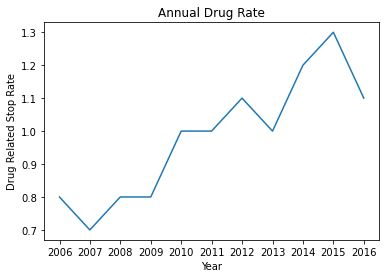

In [11]:
plt.plot(annual_drug_rate)
plt.xlabel("Year")
plt.ylabel("Drug Related Stop Rate")
plt.title("Annual Drug Rate")
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [30]:
annual_searh_rate=prc(df.search_conducted.resample("y").mean())
annual_searh_rate

stop_datetime
2005-12-31    5.1
2006-12-31    3.8
2007-12-31    4.2
2008-12-31    4.0
2009-12-31    5.0
2010-12-31    4.2
2011-12-31    3.8
2012-12-31    3.2
2013-12-31    2.9
2014-12-31    3.0
2015-12-31    2.8
Freq: A-DEC, Name: search_conducted, dtype: float64

In [31]:
annual=pd.concat([annual_drug_rate,annual_searh_rate],axis=1)
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.8,5.1
2006-12-31,0.7,3.8
2007-12-31,0.8,4.2
2008-12-31,0.8,4.0
2009-12-31,1.0,5.0
2010-12-31,1.0,4.2
2011-12-31,1.1,3.8
2012-12-31,1.0,3.2
2013-12-31,1.2,2.9


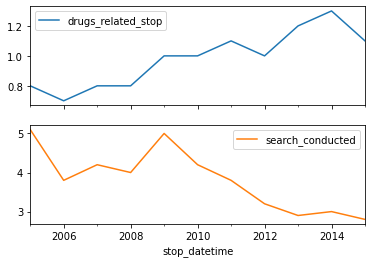

In [32]:
ap=annual.plot(subplots=True)

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [17]:
all_zones = pd.crosstab(df.district, df.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [18]:
k_zones=all_zones.loc["Zone K1":"Zone K3"]
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

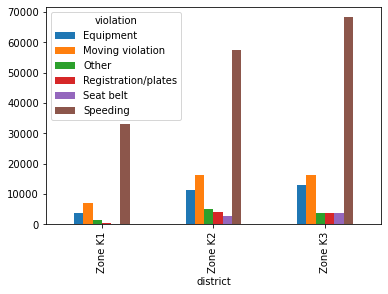

In [19]:
k=k_zones.plot.bar()

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

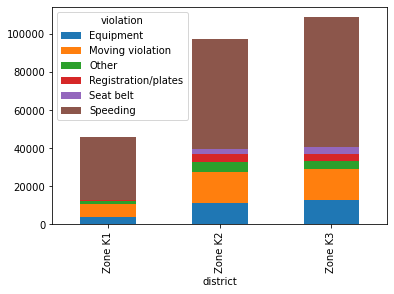

In [20]:
ks=k_zones.plot.bar(stacked=True)

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [21]:
mapping={'0-15 Min':8,'16-30 Min':23,'30+ Min':45,"1":45,"2":45}
df["stop_minutes"]=df.stop_duration.map(mapping)
df.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

In [22]:
df.stop_duration.value_counts()

0-15 Min     386646
16-30 Min     76320
30+ Min       17612
1                 5
2                 1
Name: stop_duration, dtype: int64

In [23]:
df.stop_minutes.value_counts()

8     386646
23     76320
45     17618
Name: stop_minutes, dtype: int64

In [24]:
df.stop_minutes.value_counts(dropna=False)

8     386646
23     76320
45     17618
Name: stop_minutes, dtype: int64

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [39]:
stop_length=round(df.groupby("violation_raw").stop_minutes.mean())

violation_raw
APB                                 19.0
Call for Service                    22.0
Equipment/Inspection Violation      11.0
Motorist Assist/Courtesy            18.0
Other Traffic Violation             14.0
Registration Violation              14.0
Seatbelt Violation                  10.0
Special Detail/Directed Patrol      15.0
Speeding                            11.0
Suspicious Person                   18.0
Violation of City/Town Ordinance    13.0
Warrant                             20.0
Name: stop_minutes, dtype: float64

In [50]:
stop_length.sort_values(inplace=True)
round(stop_length)

violation_raw
Seatbelt Violation                  10.0
Speeding                            11.0
Equipment/Inspection Violation      11.0
Violation of City/Town Ordinance    13.0
Registration Violation              14.0
Other Traffic Violation             14.0
Special Detail/Directed Patrol      15.0
Motorist Assist/Courtesy            18.0
Suspicious Person                   18.0
APB                                 19.0
Warrant                             20.0
Call for Service                    22.0
Name: stop_minutes, dtype: float64

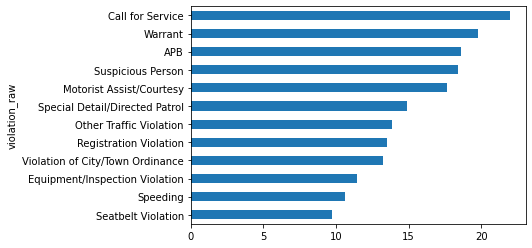

In [48]:
s=stop_length.plot.barh()


In [29]:
df.to_csv("police_3.csv")

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In this exercise, you'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a **box plot**.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees **Fahrenheit**, not Celsius!

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def prc(x):return round(x*100,1)            # yüzde (%) gösteriminde kolaylık için
def celcius(x): return   (x - 32) / 1.8     # fahrenheit i celcius a çevirir

we=pd.read_csv("weather.csv")
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
we.shape

(8022, 26)

In [3]:
we.isnull().sum()

STATION       0
DATE          0
AWND       4005
TAVG       6805
TMAX         17
TMIN         26
WT01       6245
WT02       7801
WT03       7795
WT04       7903
WT05       7662
WT06       7997
WT07       7943
WT08       7618
WT09       7953
WT10       8020
WT11       8019
WT13       6847
WT14       7447
WT15       8016
WT16       6696
WT17       8010
WT18       7677
WT19       8018
WT21       8004
WT22       7990
dtype: int64

In [4]:
 round(we[["TMIN", "TAVG", "TMAX"]].describe(),1)

,TMIN,TAVG,TMAX
count,7996.0,1217.0,8005.0
mean,42.1,52.5,61.2
std,17.4,17.8,18.5
min,-10.0,6.0,13.0
25%,29.0,39.0,46.0
50%,42.0,54.0,62.0
75%,57.0,68.0,77.0
max,77.0,86.0,102.0


<AxesSubplot:>

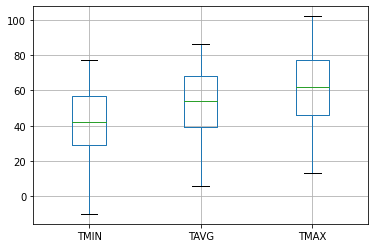

In [5]:
we[["TMIN", "TAVG", "TMAX"]].plot.box(grid=True)

In [6]:
# Görselleştirmeyi alışkın olduğumuz Celcius sıcaklık birimine dönüştürelim

In [7]:
we[["CTMIN", "CTAVG", "CTMAX"]]=celcius(we[["TMIN", "TAVG", "TMAX"]])

In [8]:
 round(we[["CTMIN", "CTAVG", "CTMAX"]].describe())

,CTMIN,CTAVG,CTMAX
count,7996.0,1217.0,8005.0
mean,6.0,11.0,16.0
std,10.0,10.0,10.0
min,-23.0,-14.0,-11.0
25%,-2.0,4.0,8.0
50%,6.0,12.0,17.0
75%,14.0,20.0,25.0
max,25.0,30.0,39.0


<AxesSubplot:>

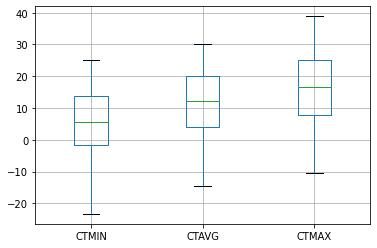

In [9]:
we[["CTMIN", "CTAVG", "CTMAX"]].plot.box(grid=True)

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [10]:
we["TDIFF"]=we.TMAX-we.TMIN

In [11]:
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT16,WT17,WT18,WT19,WT21,WT22,CTMIN,CTAVG,CTMAX,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.222222,NaN,8.333333,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.444444,NaN,11.111111,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.777778,NaN,8.888889,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.444444,NaN,12.222222,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.555556,NaN,6.666667,13.0


In [12]:
we.TDIFF.dtypes

dtype('float64')

In [13]:
round(we.TDIFF.describe(),1)

count    7994.0
mean       19.1
std         7.0
min       -25.0
25%        14.0
50%        19.0
75%        24.0
max        48.0
Name: TDIFF, dtype: float64

<AxesSubplot:ylabel='Frequency'>

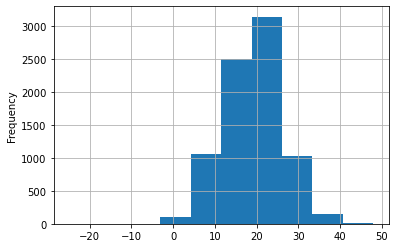

In [14]:
we.TDIFF.plot.hist(20, grid=True)

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [15]:
wt=we.iloc[:,6:26]
wt.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
we["bad_conditions"]=wt.sum(axis=1)
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT17,WT18,WT19,WT21,WT22,CTMIN,CTAVG,CTMAX,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.222222,NaN,8.333333,19.0,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.444444,NaN,11.111111,28.0,0.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.777778,NaN,8.888889,21.0,0.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.444444,NaN,12.222222,14.0,0.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.555556,NaN,6.666667,13.0,0.0


<AxesSubplot:ylabel='Frequency'>

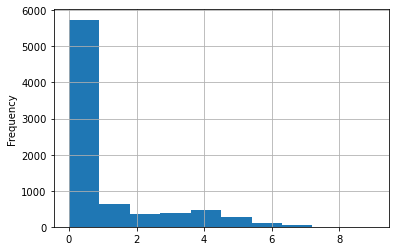

In [17]:
we.bad_conditions.plot.hist(20, grid=True)

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [18]:
we.bad_conditions.sum()

6779.0

In [19]:
we.bad_conditions.value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
9.0       4
8.0       4
Name: bad_conditions, dtype: int64

In [20]:
we.groupby("STATION").bad_conditions.value_counts()

STATION      bad_conditions
USC00371874  1.0                  7
             2.0                  1
USC00371875  1.0                  6
USC00379423  0.0               3989
             1.0                  2
USW00014765  0.0               1749
             1.0                613
             4.0                476
             3.0                380
             2.0                367
             5.0                282
             6.0                101
             7.0                 41
             8.0                  4
             9.0                  4
Name: bad_conditions, dtype: int64

In [21]:
we.STATION.value_counts()

USW00014765    4017
USC00379423    3991
USC00371874       8
USC00371875       6
Name: STATION, dtype: int64

In [22]:
we.bad_conditions.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [23]:
mapping={0:"good",1:"bad",2:"bad",3:"bad",4:"bad",5:"worse",6:"worse",7:"worse",8:"worse",9:"worse"}

In [24]:
we["rating"]=we.bad_conditions.map(mapping)
we.rating.unique()

array(['good', 'bad', 'worse'], dtype=object)

In [25]:
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT18,WT19,WT21,WT22,CTMIN,CTAVG,CTMAX,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.222222,NaN,8.333333,19.0,0.0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-4.444444,NaN,11.111111,28.0,0.0,good
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.777778,NaN,8.888889,21.0,0.0,good
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.444444,NaN,12.222222,14.0,0.0,good
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.555556,NaN,6.666667,13.0,0.0,good


***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [26]:
cats=("good","bad","worse")

In [27]:
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
we.rating=we.rating.astype(cat_dtype)

In [28]:
we.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [29]:
weather_rating=we[we.STATION=="USW00014765"][["DATE","rating"]]
weather_rating

,DATE,rating
4005,2005-01-01,bad
4006,2005-01-02,bad
4007,2005-01-03,bad
4008,2005-01-04,bad
4009,2005-01-05,bad
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


In [30]:
ri=pd.read_csv("police_3.csv")
ri.head()

C:\Users\C\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,8
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,23
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False,45


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

**INSTRUCTIONS**
- Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
- Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
- Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [31]:
ri.shape

(480584, 25)

In [32]:
weather_rating.shape

(4017, 2)

In [33]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left').drop_duplicates()

In [34]:
ri_weather.shape

(480584, 27)

In [35]:
ri_weather=ri_weather.drop_duplicates()
ri_weather.shape

(480584, 27)

In [36]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,bad
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,Citation,False,16-30 Min,False,False,Zone X4,False,23,2005-01-02,bad
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-04,bad
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-06,worse
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,Citation,False,30+ Min,True,False,Zone X1,False,45,2005-01-12,worse


In [37]:
ri_weather.set_index("stop_datetime",inplace=True)
ri_weather.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,Citation,False,16-30 Min,False,False,Zone X4,False,23,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-04,bad
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-06,worse
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,Citation,False,30+ Min,True,False,Zone X1,False,45,2005-01-12,worse


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

**INSTRUCTIONS**
- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [38]:
prc(ri_weather.is_arrested.value_counts(normalize=True))


False    96.5
True      3.5
Name: is_arrested, dtype: float64

In [39]:
 ri_weather.is_arrested.mean()

0.03454755048024903

In [40]:
# (toplam tutuklama yüzdesi)",)

In [41]:
wri=pd.crosstab(ri_weather.rating, ri_weather.is_arrested)
wri

is_arrested,False,True
rating,,
good,214855,7333
bad,208806,7618
worse,40320,1652


In [42]:
wri["Arrested_Percent"]=prc(ri_weather.groupby("rating").is_arrested.mean())
wri

is_arrested,False,True,Arrested_Percent
rating,,,
good,214855,7333,3.3
bad,208806,7618,3.5
worse,40320,1652,3.9


In [43]:
prc(ri_weather.groupby("rating").is_arrested.mean().mean())

3.6

In [44]:
#  Hava durumu  kötüleştikçe tutukla oranları artıyor

In [45]:
# **Hava durum kaydı tüm günler için mevcut ** 
# ri_weather.rating.value_counts().sum()  = 480584

In [46]:
lll=prc(ri_weather.groupby(["violation","rating"]).is_arrested.mean())
lll

violation            rating
Equipment            good      5.6
                     bad       6.0
                     worse     9.4
Moving violation     good      5.6
                     bad       5.8
                     worse     6.2
Other                good      8.2
                     bad       8.5
                     worse     5.9
Registration/plates  good      7.7
                     bad       9.3
                     worse     9.9
Seat belt            good      2.6
                     bad       2.9
                     worse     0.0
Speeding             good      1.3
                     bad       1.3
                     worse     1.7
Name: is_arrested, dtype: float64

In [47]:
round(lll.mean(),1)

5.4

In [48]:
#  ihlal yapıldığı zamanlarda tutuklama yüzdesi, yüzde artıyor

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [49]:
arrest_rate = prc(ri_weather.groupby(['rating', 'violation']).is_arrested.mean())

In [50]:
arrest_rate

rating  violation          
good    Equipment              5.6
        Moving violation       5.6
        Other                  8.2
        Registration/plates    7.7
        Seat belt              2.6
        Speeding               1.3
bad     Equipment              6.0
        Moving violation       5.8
        Other                  8.5
        Registration/plates    9.3
        Seat belt              2.9
        Speeding               1.3
worse   Equipment              9.4
        Moving violation       6.2
        Other                  5.9
        Registration/plates    9.9
        Seat belt              0.0
        Speeding               1.7
Name: is_arrested, dtype: float64

In [51]:
#  kötü hava da "Moving violations" durumundaki yakalama oranı 

In [52]:
arrest_rate.loc["bad", "Moving violation"] 

5.8

In [53]:
# hız ihlali yapıldığı zamanlarda daki tutuklama oranları 

In [54]:
prc(ri_weather[ri_weather.violation=="Speeding"].is_arrested.mean())

1.4

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [55]:
arrest_rate.unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,5.6,5.6,8.2,7.7,2.6,1.3
bad,6.0,5.8,8.5,9.3,2.9,1.3
worse,9.4,6.2,5.9,9.9,0.0,1.7


In [56]:
veri=pd.pivot_table(ri_weather,values='is_arrested', index='rating',columns='violation',
                    aggfunc=np.mean)
prc(veri)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,5.6,5.6,8.2,7.7,2.6,1.3
bad,6.0,5.8,8.5,9.3,2.9,1.3
worse,9.4,6.2,5.9,9.9,0.0,1.7


In [57]:
fg=prc(veri.transpose())
fg

rating,good,bad,worse
violation,,,
Equipment,5.6,6.0,9.4
Moving violation,5.6,5.8,6.2
Other,8.2,8.5,5.9
Registration/plates,7.7,9.3,9.9
Seat belt,2.6,2.9,0.0
Speeding,1.3,1.3,1.7


In [58]:
# Grafikle izleyelim

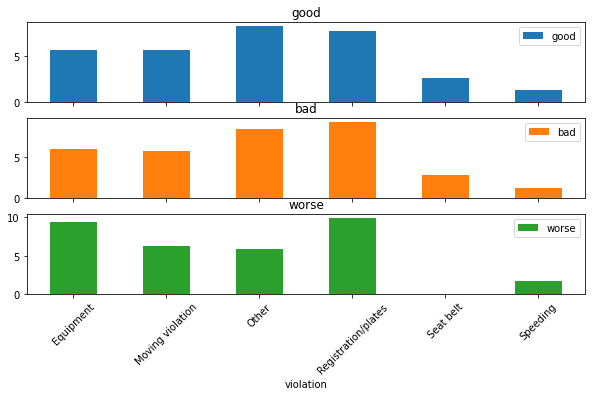

In [59]:
ff=fg.plot.bar( subplots=True,rot=45,figsize=(10,5))

In [60]:
# Hava durumu çok kötü "worse " olduğunda herkes kemerlerini takıyormuş :)

In [61]:
ri_weather.to_csv("ri_weather.csv")